## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list

### 1

In [1]:
import numpy as np

In [2]:
def linspace_for_loop(start, end, num):
    step = (end - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + i * step)
    return result

In [3]:
def linspace_list_comprehesion(start, end, num):
    return [start + i * (end - start) / (num - 1) for i in range(num)]

In [4]:
np.linspace(2.0, 3.0, num=5)

array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])

In [5]:
linspace_for_loop(2.0, 3.0, num=5)

[2.0, 2.25, 2.5, 2.75, 3.0]

In [6]:
linspace_list_comprehesion(2.0, 3.0, num=5)

[2.0, 2.25, 2.5, 2.75, 3.0]

In [7]:
%timeit np.linspace(2.0, 3.0, num=5)
%timeit linspace_for_loop(2.0, 3.0, num=5)
%timeit linspace_list_comprehesion(2.0, 3.0, num=5)

The slowest run took 7.60 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.17 µs per loop
1000000 loops, best of 3: 1.43 µs per loop
1000000 loops, best of 3: 1.35 µs per loop


### 2

In [8]:
%timeit x = np.arange(1000000)
%timeit y = range(1000000)

x = np.arange(1000000)
y = range(1000000)

print type(x), len(x)
print type(y), len(y)

1000 loops, best of 3: 1.46 ms per loop
100 loops, best of 3: 15.4 ms per loop
<type 'numpy.ndarray'> 1000000
<type 'list'> 1000000


In [9]:
x = np.append(x, 1)
y.append(1)

print len(x)
print len(y)

%timeit np.append(x, 1)
%timeit y.append(1)

1000001
1000001
1000 loops, best of 3: 1.14 ms per loop
10000000 loops, best of 3: 90 ns per loop


## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

In [10]:
%matplotlib inline

In [11]:
from matplotlib import pylab as plt

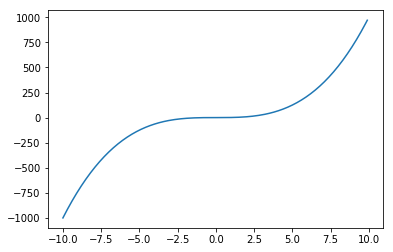

In [12]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.show()

### 1

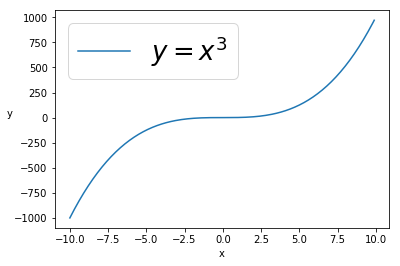

In [13]:
plt.plot(x, y, label='$y = x^3$')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=0, prop={'size': 26})
plt.show()

### 2

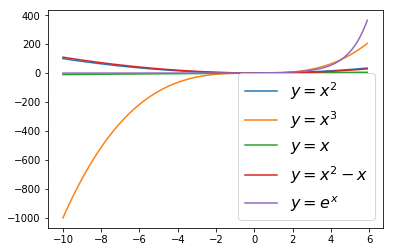

In [14]:
x = np.arange(-10, 6, 0.1)
plt.plot(x, x**2, label='$y = x^2$')
plt.plot(x, x**3, label='$y = x^3$')
plt.plot(x, x, label='$y = x$')
plt.plot(x, x**2 - x, label='$y = x^2 - x$')
plt.plot(x, np.exp(x), label='$y = e^x$')
plt.legend(loc=0, prop={'size': 16})
plt.show()

### 3

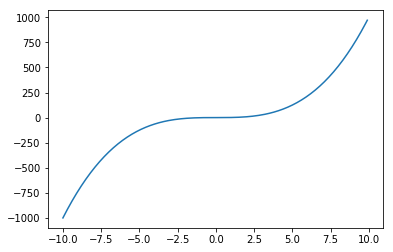

In [15]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.savefig('plot.png')

## Задание на Numpy+Matplotlib
1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

### 1

In [16]:
x_1 = np.linspace(-1, 1, 500)

In [17]:
np.random.seed(42)

In [18]:
y_1 = 2 * x_1 - 1 + np.random.randn(len(x_1)) * np.sqrt(0.1)

### 2

In [19]:
x_2 = np.linspace(-1, 1, 100)
y_2 = 1 + np.random.randn(len(x_2)) * np.sqrt(0.1)

### 3

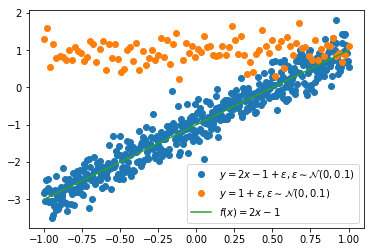

In [20]:
plt.plot(x_1, y_1, 'o', label='$y = 2x - 1 + \epsilon, \epsilon \sim \mathcal{N}(0, 0.1)$')
plt.plot(x_2, y_2, 'o', label='$y = 1 + \epsilon, \epsilon \sim \mathcal{N}(0, 0.1)$')
plt.plot(x_1, 2 * x_1 - 1, '-', label='$f(x) = 2x - 1$')
plt.legend(loc=0, prop={'size': 10})
plt.show()

In [21]:
x_all = np.hstack((x_1, x_2))
y_all = np.hstack((y_1, y_2))

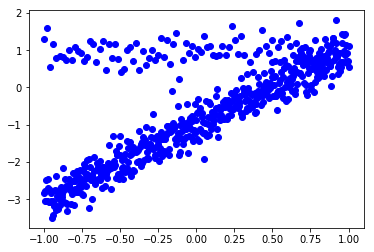

In [29]:
plt.plot(x_all, y_all, 'bo')
plt.show()

In [30]:
def pred(coef, x):
    k, b = coef
    return k * x + b

In [32]:
def loss_sec_deg(coef):
    return sum((pred(coef, x_all) - y_all) ** 2)

In [33]:
def loss_abs(coef):
    return sum(np.abs(pred(coef, x_all) - y_all))

In [34]:
from scipy import optimize
coef_1 = optimize.minimize(loss_sec_deg, [1.0, 1.0]).x
coef_2 = optimize.minimize(loss_abs, [1.0, 1.0]).x

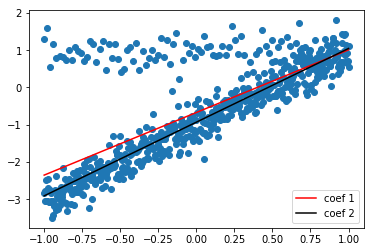

In [37]:
x = np.linspace(-1, 1, 1000)
plt.plot(x_all, y_all, 'o')
plt.plot(x, coef_1[0] * x + coef_1[1], 'r-', label='coef 1')
plt.plot(x, coef_2[0] * x + coef_2[1], 'k-', label='coef 2')
plt.legend(loc=0)
plt.show()

In [38]:
print coef_1, coef_2

[ 1.68094257 -0.67094185] [ 1.97810136 -0.93083201]
